In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,r2_score,classification_report,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor


In [2]:
df=pd.read_csv('laptopPrice.csv')
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [4]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

<AxesSubplot:xlabel='brand', ylabel='Price'>

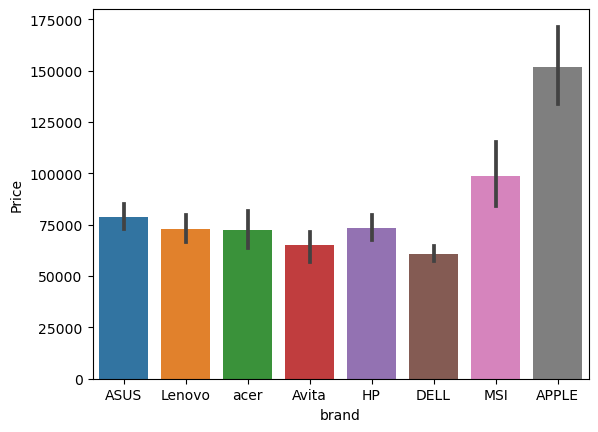

In [5]:
sns.barplot(x=df['brand'], y=df['Price'])

<AxesSubplot:xlabel='ram_gb', ylabel='Price'>

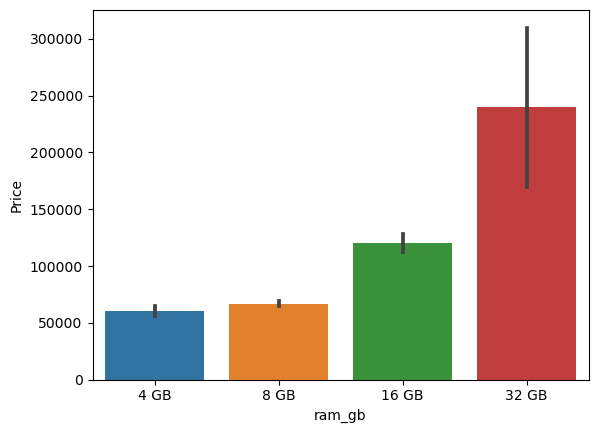

In [6]:
sns.barplot(x=df['ram_gb'],y=df['Price'])

<AxesSubplot:xlabel='rating', ylabel='Price'>

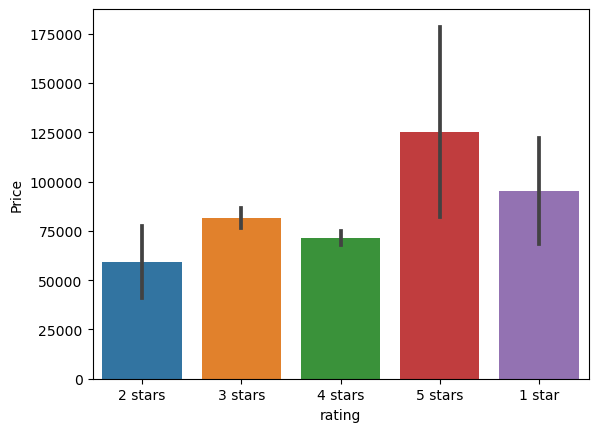

In [7]:
sns.barplot(x=df['rating'],y=df['Price'])

<AxesSubplot:xlabel='ram_type', ylabel='Price'>

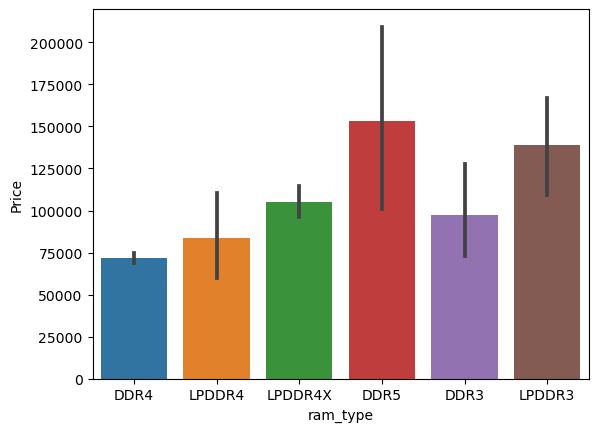

In [8]:
sns.barplot(x=df['ram_type'],y=df['Price'])

<AxesSubplot:xlabel='graphic_card_gb', ylabel='Price'>

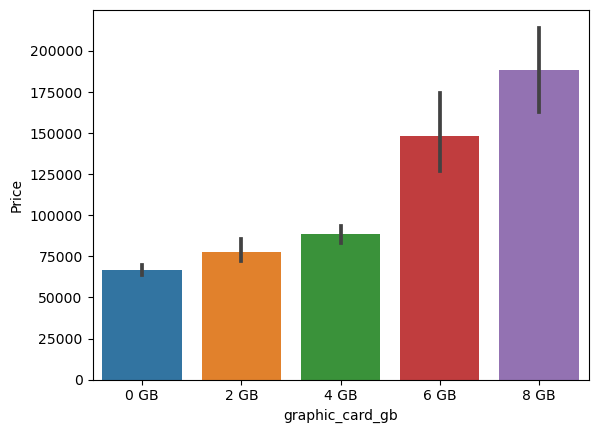

In [9]:

sns.barplot(x=df['graphic_card_gb'],y=df['Price'])

In [10]:
df['ram_gb']=df['ram_gb'].str.replace(" GB"," ")
df['ssd']=df['ssd'].str.replace(" GB"," ")
df['hdd']=df['hdd'].str.replace(" GB"," ")
df['graphic_card_gb']=df['graphic_card_gb'].str.replace(" GB"," ")




In [11]:
df['ram_gb']=df['ram_gb'].astype('int64')
df['hdd']=df['hdd'].astype('int64')
df['ssd']=df['ssd'].astype('int64')
df['graphic_card_gb']=df['graphic_card_gb'].astype('int64')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    int64 
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    int64 
 7   hdd                823 non-null    int64 
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    int64 
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [18]:
### dropping columns

In [15]:
df.drop(columns=['processor_brand','processor_name','processor_gnrtn','ram_type','os','os_bit','weight','warranty','Touchscreen','msoffice','rating','Number of Ratings','Number of Reviews'],axis=1,inplace=True)

In [16]:
df.head()

,brand,ram_gb,ssd,hdd,graphic_card_gb,Price
0,ASUS,4,0,1024,0,34649
1,Lenovo,4,0,1024,0,38999
2,Lenovo,4,0,1024,0,39999
3,ASUS,8,512,0,2,69990
4,ASUS,4,0,512,0,26990


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            823 non-null    object
 1   ram_gb           823 non-null    int64 
 2   ssd              823 non-null    int64 
 3   hdd              823 non-null    int64 
 4   graphic_card_gb  823 non-null    int64 
 5   Price            823 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 38.7+ KB


In [34]:
x=df.drop(columns=['Price','brand'])
y=df["Price"]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((658, 4), (658,), (165, 4), (165,))

In [54]:
### Linear Regression

In [39]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
train_pred=model.predict(x_train)

In [48]:
print('MAE:',mean_absolute_error(y_train,train_pred))
print('R2:',r2_score(y_train,train_pred))
print('RMSE:',np.sqrt(mean_absolute_error(y_train,train_pred)))



MAE: 19789.152702790983
R2: 0.5704811514513198
RMSE: 140.67392332195396


In [49]:
test_pred=model.predict(x_test)

In [51]:
print('MAE:',mean_absolute_error(y_test,test_pred))
print('R2:',r2_score(y_test,test_pred))
print('RMSE:',np.sqrt(mean_absolute_error(y_test,test_pred)))

MAE: 22735.810418191977
R2: 0.3954502558586592
RMSE: 150.78398594742075


In [ ]:
### DT

In [75]:
model_dt=DecisionTreeRegressor(max_depth=5)
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [76]:
dt_train_pred=model_dt.predict(x_train)

In [77]:
print('MAE:',mean_absolute_error(y_train,dt_train_pred))
print('R2:',r2_score(y_train,dt_train_pred))
print('RMSE:',np.sqrt(mean_absolute_error(y_train,dt_train_pred)))

MAE: 17389.593184458303
R2: 0.6924877504524387
RMSE: 131.8696067502224


In [78]:
dt_test_pred=model_dt.predict(x_test)

In [79]:
print('MAE:',mean_absolute_error(y_test,dt_test_pred))
print('R2:',r2_score(y_test,dt_test_pred))
print('RMSE:',np.sqrt(mean_absolute_error(y_test,dt_test_pred)))

MAE: 22444.22854209431
R2: 0.3613003172292828
RMSE: 149.81397979525914


In [ ]:
### RF

In [85]:
model_rf=RandomForestRegressor(n_estimators=50)
model_rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [86]:
rf_train_pred=model_rf.predict(x_train)

In [87]:
print('MAE:',mean_absolute_error(y_train,rf_train_pred))
print('R2:',r2_score(y_train,rf_train_pred))
print('RMSE:',np.sqrt(mean_absolute_error(y_train,rf_train_pred)))

MAE: 15500.442354094344
R2: 0.7254933008701782
RMSE: 124.50077250400635


In [89]:
rf_test_pred=model_rf.predict(x_test)

In [90]:
print('MAE:',mean_absolute_error(y_test,rf_test_pred))
print('R2:',r2_score(y_test,rf_test_pred))
print('RMSE:',np.sqrt(mean_absolute_error(y_test,rf_test_pred)))

MAE: 21966.238259107282
R2: 0.3718049932025058
RMSE: 148.21011523883004


In [91]:
###AdaBoostRegressor

In [92]:
model_ad=AdaBoostRegressor()
model_ad.fit(x_train,y_train)

AdaBoostRegressor()

In [93]:
ad_train_pred=model_ad.predict(x_train)

In [100]:
print('MAE:',mean_absolute_error(y_train,ad_train_pred))
print('R2:',r2_score(y_train,ad_train_pred)*100)
print('RMSE:',np.sqrt(mean_absolute_error(y_train,ad_train_pred)))

MAE: 22457.74115881499
R2: 59.286680471949495
RMSE: 149.85907099276636


In [95]:
ad_test_pred=model_ad.predict(x_test)

In [99]:
print('MAE:',mean_absolute_error(y_test,ad_test_pred))
print('R2:',r2_score(y_test,ad_test_pred)*100)
print('RMSE:',np.sqrt(mean_absolute_error(y_test,ad_test_pred)))

MAE: 26964.699455171994
R2: 30.131223369028714
RMSE: 164.20931598168235


In [123]:
x_train.head(1)

,ram_gb,ssd,hdd,graphic_card_gb
239,16,512,0,0


In [117]:
### Checking pred
import warnings
warnings.filterwarnings('ignore')

In [129]:
features = np.array([[8,1,0,32]])

In [131]:
model.predict(features)

array([172840.19000024])

In [132]:
model_ad.predict(features)

array([183833.84810127])

In [133]:
model_dt.predict(features)

array([193640.])

In [134]:
model_rf.predict(features)

array([177403.13733333])